## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

#### 1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.
#### 2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

for i in range(1000):
y_pred = np.dot(W, X)
err = calc_mse(y, y_pred)
'''for ii in range(W.shape[0]):
W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
if i % 100 == 0:
print(i, W, err)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [5]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

### 1. Подберите скорость обучения (alpha) и количество итераций:

In [6]:
n = X.shape[1]
alpha = 6.39e-2 # 0.1

W = np.array([1, 0.5])
print(f' Weights - {W}, \n learning rate - {alpha}, \n X - {X}, \n Y - {y}')

 Weights - [1.  0.5], 
 learning rate - 0.0639, 
 X - [[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  2  1  3  0  5 10  1  2]], 
 Y - [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]


In [7]:
for i in range(220):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # print(y_pred, '\n', err)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 10 == 0:
        print(i, W, err)

0 [ 8.04178 22.226  ] 3173.15
10 [27.46108701 12.76625635] 769.7277231196898
20 [37.26015448  8.19726668] 214.17593131817085
30 [42.2036014   5.98800211] 85.21607402477306
40 [44.69691392  4.91853594] 55.149409303088966
50 [45.95419473  4.40023485] 48.10787855340086
60 [46.58806892  4.1487593 ] 46.45121669452431
70 [46.90758671  4.02660472] 46.05965360951217
80 [47.06861931  3.9671995 ] 45.966678123278605
90 [47.14976479  3.93827674] 45.94450057426517
100 [47.19064862  3.92417887] 45.93918684988667
110 [47.21124448  3.91729928] 45.93790814379234
120 [47.22161864  3.91393831] 45.93759914255951
130 [47.22684351  3.9122945 ] 45.93752417266622
140 [47.22947469  3.91148964] 45.93750591435635
150 [47.23079958  3.91109512] 45.93750145179753
160 [47.23146665  3.91090154] 45.937500357450425
170 [47.23180248  3.91080645] 45.93750008825362
180 [47.23197153  3.91075969] 45.93750002184513
190 [47.23205663  3.91073668] 45.937500005419786
200 [47.23209946  3.91072534] 45.93750000134748
210 [47.232121

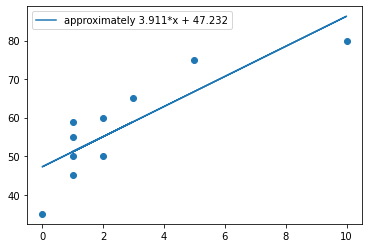

In [8]:
plt.scatter(X[1,:], y)
plt.plot(X[1, :], W[1]*X[1, :] + W[0], label=f'approximately {round(W[1],3)}*x + {round(W[0],3)}')
plt.legend()

### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [9]:
n = X.shape[1]
alpha = 6.39e-2 # 0.1

W = np.array([1, 0.5])
print(f' Weights - {W}, \n learning rate - {alpha}, \n X - {X}, \n Y - {y}')

 Weights - [1.  0.5], 
 learning rate - 0.0639, 
 X - [[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  2  1  3  0  5 10  1  2]], 
 Y - [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]


## Ошибка в использовании numpy.sum - без параметров выдает 1 число, но нужен вектор (axis = 1)

In [150]:
for i in range(220):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    Wshift = (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    W = W - Wshift
    if i % 100 == 0:
        print(i, W, err)

0 [47.23214286  3.91071429] 45.93749999999999
100 [47.23214286  3.91071429] 45.9375
200 [47.23214286  3.91071429] 45.93749999999999
